##### Algorithms and Data Structures (Winter - Spring 2022)

* [Colab view](https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_sandbox_6.ipynb)
* [nbviewer view](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_intro_1.ipynb)
* [ACSL / USACO](Exercises.ipynb)
* [Repo](https://github.com/4dsolutions/elite_school/)
* Main Text 
    -   [Algorithms](ADS_intro_1.ipynb) 
    -   [Algorithms (continued)](ADS_intro_2.ipynb)
    -   [Structured Data](ADS_intro_3.ipynb)
* Projects 
    -   [Wordle](ADS_project_1.ipynb)
* Research 
    -   [Word Sets and Graph Theory](ADS_research_1.ipynb)
* Sandboxes 
    -   [Spatial Geometry](ADS_sandbox.ipynb)  
    -   [Finite Groups](ADS_sandbox_2.ipynb)  
    -   [Chess](ADS_sandbox_3.ipynb)
    -   [Soccer](ADS_sandbox_4.ipynb)
    -   [Maps](ADS_sandbox_5.ipynb)
    -   [Graphs](ADS_sandbox_6.ipynb)

*Lets talk more about...*
# Graph Theory

FAQ: 
* Q: What is a graph? <br /> 
  A: Nodes connected by edges.
* Q: Is a polyhedron a graph? <br />A: Yes, by some definitions.
* Q: What terminology applies, pertaining to Graphs? <br /> 
  A: I'm so glad you asked.

What computer scientists often talk about, in connection with Graph Theory, are road and rail networks.  Roads come together at intersections, which are sometimes traffic circles.  Rail roads have switches and round houses, allowing trains to access all the connected tracks, even if they must reverse direction to do so sometimes.

In thinking about road and rail, we also think about direction.  A directed graph tells us in which direction a road runs, perhaps in both, perhaps not. Ditto with railways.  

Perhaps a route is one way north to south for some hours, and south to north at other hours.  Freeways with extra express lanes may change their directionality to coincide with rush hour requirements.

A final factor we will consider is "weight" which can mean a lot of things, such as distance.  

However "weight" may fold in many more measurements than simply "time between nodes" at a certain speed.  

Regarding the "weightiness" of a Route:

* How twisty is this road? 
* Do wild animals suddenly appear in the headlights?
* What about the number of lanes?  
* How stressful is this road to drive?  
* Does this road have any gas stops or other facilities?
* Does this road feature steep drop offs with no guard rails?  

One might imagine a long checklist of criteria, adding up to what we would call a segment's score.  

Once we have a score associated with each edge, we're ready to apply such algorithm's as Djikstra's.

Djikstra's Algorithm is about minizine the total weight between any starting node, and every other node in the network.

#### Representing Graph Data Structures

However, before we start implementing the repeating steps of the Djikstra Algorithm, or other algorithms, we need a way to store and retrieve graph representations.  

How will we tell ourselves what nodes could be next, from where we are now?  

We will need to know what node are reachable from the current node. We may need to remember where we've come from, so we don't hop back.  

If the graph has directionality (some are always both directional along every edge), and/or if it's weighted, how will we register this information for the various algorithms to make sense of?

Let's consider some articles: 

* [Graph Basics Contributed by: Ruchi Nayyar](https://www.mygreatlearning.com/blog/representing-graphs-in-data-structures/)

* [Representing Graph Data Structures by Jackson Gilkey](https://towardsdatascience.com/representing-graph-data-structures-6e3c19ccd677)

* [Weighted Graphs at Emory](https://www.mathcs.emory.edu/~cheung/Courses/171/Syllabus/11-Graph/weighted.html)

* [New Insights on the Power of Graphs](https://towardsdatascience.com/new-insights-on-the-power-of-graphs-48ad39f61307)

* [Graph Traversal at Wikipedia](https://en.wikipedia.org/wiki/Graph_traversal)

* [Graph Algorithms at Wikipedia](https://en.wikipedia.org/wiki/Category:Graph_algorithms)

* [Journal of Graph Algorithms and Applications](https://jgaa.info/)

In [1]:
# https://youtu.be/RqQBh_Wbcu4  to embed

A graph can be represented using 3 data structures: 

* adjacency matrix
* adjacency list
* adjacency set

####  Adjacency Matrix

This is one solution for storing both directionality and weighting. Think of a Cartesian product, or just product, pairing every element in a set with every other, including itself.

In [2]:
import numpy as np
import pandas as pd

In an adjacency matrix, we're not looking for a product of row times column, but whether the two nodes are connected, yes or no.  

If the idea is "row to column", then a 1 in (a, b) but not in (b, a) would mean traffic could only go in the (a, b) direction -- in which case we have our directionality.  

Then if the nodes k, m are connected, they might have some number stored at W(k, m), not just 1 or 0.  A positive number would be the weight, whereas a 0 would mean the obvious: that a node is connected to only itself.

Therefore an adjacency matrix might look like this, using random lengths, randomly interconnection some nodes.

In [3]:
mult_table = np.random.randint(0, 10, (5, 5))
graph_data = mult_table * np.random.randint(0, 2, (5,5), dtype = int)
np.fill_diagonal(graph_data, 0)
graph_data

array([[0, 0, 3, 1, 3],
       [9, 0, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [6, 0, 9, 0, 1],
       [0, 0, 0, 5, 0]])

In [4]:
graph_table = pd.DataFrame(data = graph_data, 
                           index = ['a', 'b', 'c', 'd', 'e'], 
                           columns = ['a','b', 'c', 'd', 'e'], dtype=int)

graph_table

,a,b,c,d,e
a,0,0,3,1,3
b,9,0,3,0,0
c,0,0,0,0,0
d,6,0,9,0,1
e,0,0,0,5,0


####  Adjacency List

An adjacency list might use (node1, node2) tuples, with node1 -> node2 the implied direction.  Store (node2, node1) for a route in the other direction.  Tuples are valid keys in a dictionary.  The values will be the weights of each road.

Once we have selected our workaday data structure for the graph itself, we will need additional structures in order to accomplish Djikstra's algorithm.  

For example, we will need a dictionary associating every node with a shortest distance attained for it so far.  We will also want lists of visted and unvisited nodes.

Suppose we have selected the data structure below to represent our graph.  

`('node0', node1'): weight` 

would be one item in our graph's dict.

In [5]:
G = {('a','b'): 5,
     ('b','a'): 5,
     ('b','c'): 6,
     ('b','d'): 3,
     ('d','e'): 1,
     ('e','d'): 2,
     ('e','a'): 5,
     ('a','e'): 2}

In [6]:
current = 'b'
previous = 'a'
f = filter(lambda pair: 
           (pair[0] == current) and 
           (pair[1] != previous), 
           G)

In [7]:
list(f)

[('b', 'c'), ('b', 'd')]

In [8]:
def get_next(current: str, previous: str, G: dict) -> list:
    results = []
    f = filter(lambda pair: (pair[0] == current) and (pair[1] != previous), G)
    for e in f:
        results.append((e, G[e]))
    return sorted(results, key=lambda p: p[1])  # sort by ascending weight

In [9]:
get_next('b', 'a', G)

[(('b', 'd'), 3), (('b', 'c'), 6)]

In [10]:
def get_nodes(G:dict) -> list:
    the_nodes = [ ]
    # more code goes here
    return the_nodes

### How Do We Represent Polyhedrons?

The data structure for a polyhedron often starts with faces as a list of nodes.  We go around the face in order, clockwise or counter-clockwise.  Does it matter in which way?  It might.  To be clear, clockwise looking from the outside in is the same as counterclockwise looking from inside out.

Given faces are nodes in a ring, that last node connects the the first.

From faces we may distill edges, e.g. if a face is (a, b, c, d) then the edges used would be (a, b) (b, c), (c, d) and (a, d).  Keeping edge pairs unique may involve keeping them alphabetical e.g. store (a, b) only as (a, b) and not as (b, a). If what we have is a directed graph, this design might change.

The nodes themselves get to be vectors with tails at the origin i.e. if edge (a, b) is a segment between two vectors, then a and b are both vectors with tails at the origin and with tips at points a and b respectively.

With this apparatus in place we're ready to:

* scale a polyhedron (grow and shrink the vectors)
* rotate a polyhedron (rotate each of the vectors)
* write the polyhedron in POV-Ray scene description language

Additional Resources:

* [Discovering Math With Python: Chapter 7 Polyhedrons](https://github.com/4dsolutions/Python5/blob/master/Polyhedrons.ipynb)
* [Polyhedrons and SQL](https://github.com/4dsolutions/Python5/blob/master/Polyhedrons%20101.ipynb)
* [Polyhedrons and Algorithms course outline](https://cs.uwaterloo.ca/~alubiw/polyhedra.html)
* [The Winged Edge Data Structure](https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/model/winged-e.html)
* [Antiprism by Adrian Rossiter](https://antiprism.com/)
* [POV-Ray](https://www.povray.org)
* [Oregon Curriculum Network](http://4dsolutions.net/ocn/cp4e.html)

## Djikstra's Algorithm for Minimizing Path Weights

The following dp data structures will be needed:

* shortest path so far, per node e.g. shortest = `{'s':0, 'a':100000000, 'b':100000000 ...}`
* nodes already visited e.g. `{'s', 'a', 'c'}`
* nodes yet to be visted e.g. `{'b', 'd', 'f'}`
* previous nodes, when updating a shortest path e.g. `previous['d'] = 'c'`

Then perform the following steps until the yet to be visited set is empty:

1. choose a node with lowest distance from the start node (which is S itself to get going) and make this the new start node
2. visit all of that start node's neighors, obeying directionality if this is a digraph
3. if a visited node's "shortest path on file" is greater than start node + hop (weight), replace shortest on file" for the visited node, and record the current starting node as the associated previous node i.e. "hopped from where".
4. place the current node in "visited" and remove it from unvisited. Reminder: a node is "visited" *not* when first landed upon, but *only after* all of its next neighbors have been visited, i.e. it has featured as a start node itself (step 2)
5. return to step one until all nodes have been visited

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52046115336/in/dateposted-public/" title="Our Graph"><img src="https://live.staticflickr.com/65535/52046115336_e34c61bd74_z.jpg" width="640" height="480" alt="Our Graph"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

This is the messed up version, after the double arrows got added to make the point that a directed graph could have different weights in the opposite directions.  Lets look more closely at the graph we started with.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52048920660/in/dateposted-public/" title="djikstra_graph"><img src="https://live.staticflickr.com/65535/52048920660_29f8d4c788_z.jpg" width="640" height="485" alt="djikstra_graph"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52053593766/in/dateposted-public/" title="djikstra_zoom"><img src="https://live.staticflickr.com/65535/52053593766_e3b1180ec1_z.jpg" width="640" height="455" alt="djikstra_zoom"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Now let's look at the above graph as a data structure.  Another option would be an adjacency matrix.

In [11]:
# for debugging and reimporting (workflow loop)
#import djikstra
#import imp
#imp.reload(djikstra)

In [12]:
from djikstra import Solution

In [13]:
G = \
{('s','a'): 1,
 ('s','c'): 3,
 ('a','b'): 5,
 ('c','b'): 1,
 ('c','d'): 7,
 ('b','d'): 4,
 ('d','f'): 5,
 ('b','f'): 8}

infinity = int(1e8)

In [14]:
sol = Solution(G)
sol.not_visited

{'a', 'b', 'c', 'd', 'f'}

In [15]:
sol.visited

{'s'}

In [16]:
sol.get_neighbors('s')

[('a', 1), ('c', 3)]

In [17]:
sol.main()

Next to check: s(0) 
Neighbors of s: [('a', 1), ('c', 3)]
s(1) --> a(100000000)
Updating a with old dist=100000000 with shorter 1, prev = s
s(3) --> c(100000000)
Updating c with old dist=100000000 with shorter 3, prev = s
s has now been visited, removing from not_visited
Visited:  {'s'}
Not Visited:  {'d', 'b', 'c', 'a', 'f'}
Next to check: a(1) 
Neighbors of a: [('b', 5)]
a(6) --> b(100000000)
Updating b with old dist=100000000 with shorter 6, prev = a
a has now been visited, removing from not_visited
Visited:  {'a', 's'}
Not Visited:  {'d', 'b', 'c', 'f'}
Next to check: c(3) 
Neighbors of c: [('b', 1), ('d', 7)]
c(4) --> b(6)
Updating b with old dist=6 with shorter 4, prev = c
c(10) --> d(100000000)
Updating d with old dist=100000000 with shorter 10, prev = c
c has now been visited, removing from not_visited
Visited:  {'a', 's', 'c'}
Not Visited:  {'d', 'b', 'f'}
Next to check: b(4) 
Neighbors of b: [('d', 4), ('f', 8)]
b(8) --> d(10)
Updating d with old dist=10 with shorter 8, prev 

In [18]:
sol.shortest

{'d': 8, 'b': 4, 'c': 3, 'a': 1, 'f': 12, 's': 0}

In [19]:
sol.previous

{'a': 's', 'c': 's', 'b': 'c', 'd': 'b', 'f': 'b'}

In [20]:
sol.get_shortest('f')

(12, ['f', 'b', 'c', 's'])

Further resources:

[Single Source Shortest Paths: Djikstra's Algorithm](https://www.techiedelight.com/single-source-shortest-paths-dijkstras-algorithm/)

## Prim's Algorithm for the Minimum Spanning Tree (no cycles)

Prim's Algorithm, not unlike Djikstra's, involves paying attention to weights, and visited versus unvisited nodes. We also want to keep track of already visited edges.

At any given point in the algorithm, we have all edges from visited to unvisted nodes to consider, when picking the lowest weight.

In [36]:
from IPython.display import YouTubeVideo

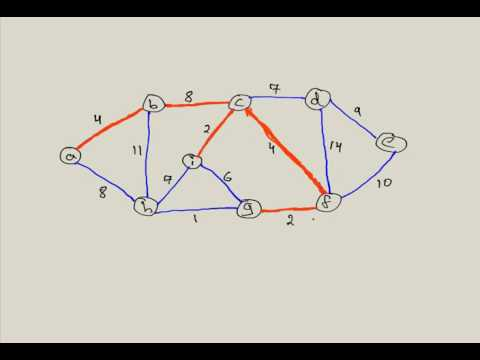

In [37]:
YouTubeVideo("Uj47dxYPow8")



<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52058112725/in/dateposted-public/" title="prim_youtube"><img src="https://live.staticflickr.com/65535/52058112725_8e06a77fcf_z.jpg" width="640" height="509" alt="prim_youtube"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [22]:
G = {
('a', 'b'): 4,
('a', 'h'): 8,
('b', 'h'): 11,
('b', 'c'): 8,
('c', 'd'): 7,
('c', 'i'): 2,
('c', 'f'): 4,
('d', 'f'): 14,
('d', 'e'): 9,
('h', 'g'): 1,
('h', 'i'): 7,
('i', 'g'): 6,
('g', 'f'): 2,
('f', 'e'): 10,
}

In [38]:
#for debugging
#import prim
#import imp
#imp.reload(prim)

In [28]:
from prim import Solution

In [29]:
s = Solution(G)

In [30]:
s.nodes_not_visited

{'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'}

In [31]:
s.get_neighbors('a')

{('a', 'b'): 4, ('a', 'h'): 8}

In [32]:
s.task()

Starting at a
Neighbors: ['b', 'h']
Possible edges: {('a', 'b'): 4, ('a', 'h'): 8}
Visited:  {'a'}
Adding next edge: ('a', 'b')
Starting at b
Neighbors: ['h', 'c']
Possible edges: {('a', 'h'): 8, ('b', 'h'): 11, ('b', 'c'): 8}
Visited:  {'a', 'b'}
Adding next edge: ('a', 'h')
Starting at h
Neighbors: ['g', 'i']
Possible edges: {('b', 'h'): 11, ('b', 'c'): 8, ('h', 'g'): 1, ('h', 'i'): 7}
Visited:  {'a', 'h', 'b'}
Adding next edge: ('h', 'g')
Starting at g
Neighbors: ['f', 'i']
Possible edges: {('b', 'h'): 11, ('b', 'c'): 8, ('h', 'i'): 7, ('g', 'f'): 2, ('g', 'i'): 6}
Visited:  {'a', 'h', 'b', 'g'}
Adding next edge: ('g', 'f')
Starting at f
Neighbors: ['e', 'c', 'd']
Possible edges: {('b', 'h'): 11, ('b', 'c'): 8, ('h', 'i'): 7, ('g', 'i'): 6, ('f', 'e'): 10, ('f', 'c'): 4, ('f', 'd'): 14}
Visited:  {'g', 'b', 'h', 'a', 'f'}
Adding next edge: ('f', 'c')
Starting at c
Neighbors: ['d', 'i']
Possible edges: {('b', 'h'): 11, ('b', 'c'): 8, ('h', 'i'): 7, ('g', 'i'): 6, ('f', 'e'): 10, ('f'

In [33]:
s.path

[('a', 'b'),
 ('a', 'h'),
 ('h', 'g'),
 ('g', 'f'),
 ('f', 'c'),
 ('c', 'i'),
 ('c', 'd'),
 ('d', 'e')]

In [34]:
s.nodes_not_visited

set()

In [35]:
s.edges_available

{('b', 'h'): 11,
 ('b', 'c'): 8,
 ('h', 'i'): 7,
 ('g', 'i'): 6,
 ('f', 'e'): 10,
 ('f', 'd'): 14}

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52057807528/in/dateposted-public/" title="prim_solved"><img src="https://live.staticflickr.com/65535/52057807528_b0cec06fff_z.jpg" width="640" height="521" alt="prim_solved"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>